In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()
import sklearn.datasets


In [11]:
from sklearn.datasets import fetch_california_housing


In [12]:
california= fetch_california_housing()

In [13]:
California=pd.DataFrame(california.data, columns=california.feature_names)


In [14]:
California['price']=california['target']

In [15]:
California.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


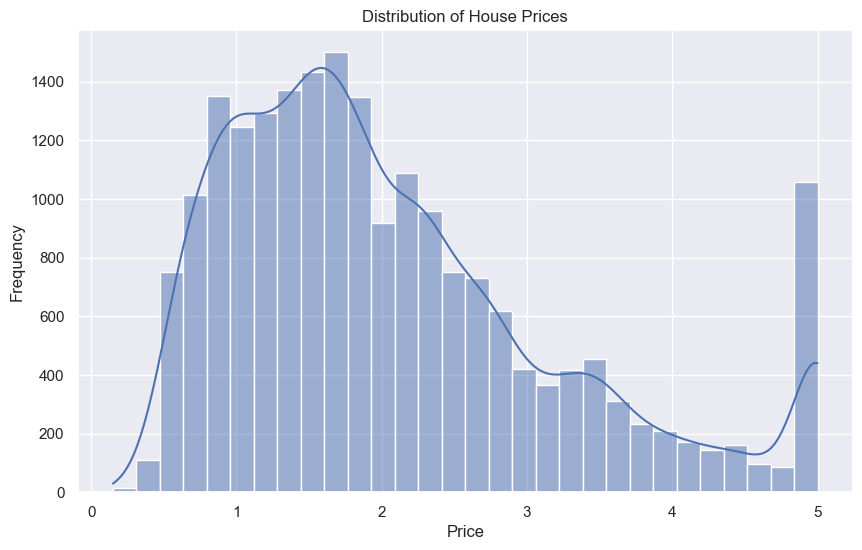

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(California['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [17]:
California.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [18]:
California.dropna(inplace=True)


In [19]:
California.duplicated().sum()

0

In [20]:
California.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

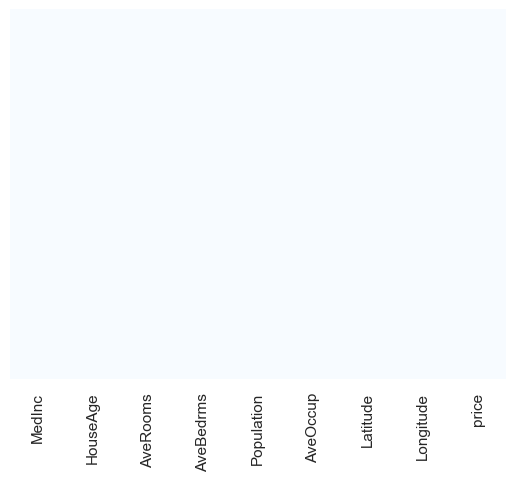

In [21]:
sns.heatmap(California.isna(),yticklabels=False,cbar=False,cmap='Blues')

<Axes: >

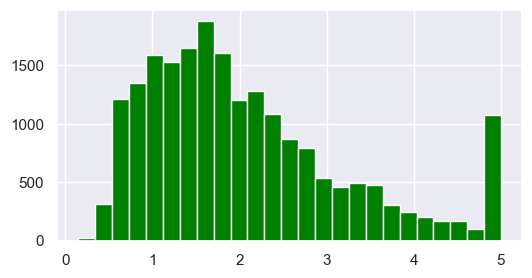

In [22]:
California['price'].hist(color='green',bins=25,figsize=(6,3))

D:\app\XboxGames\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


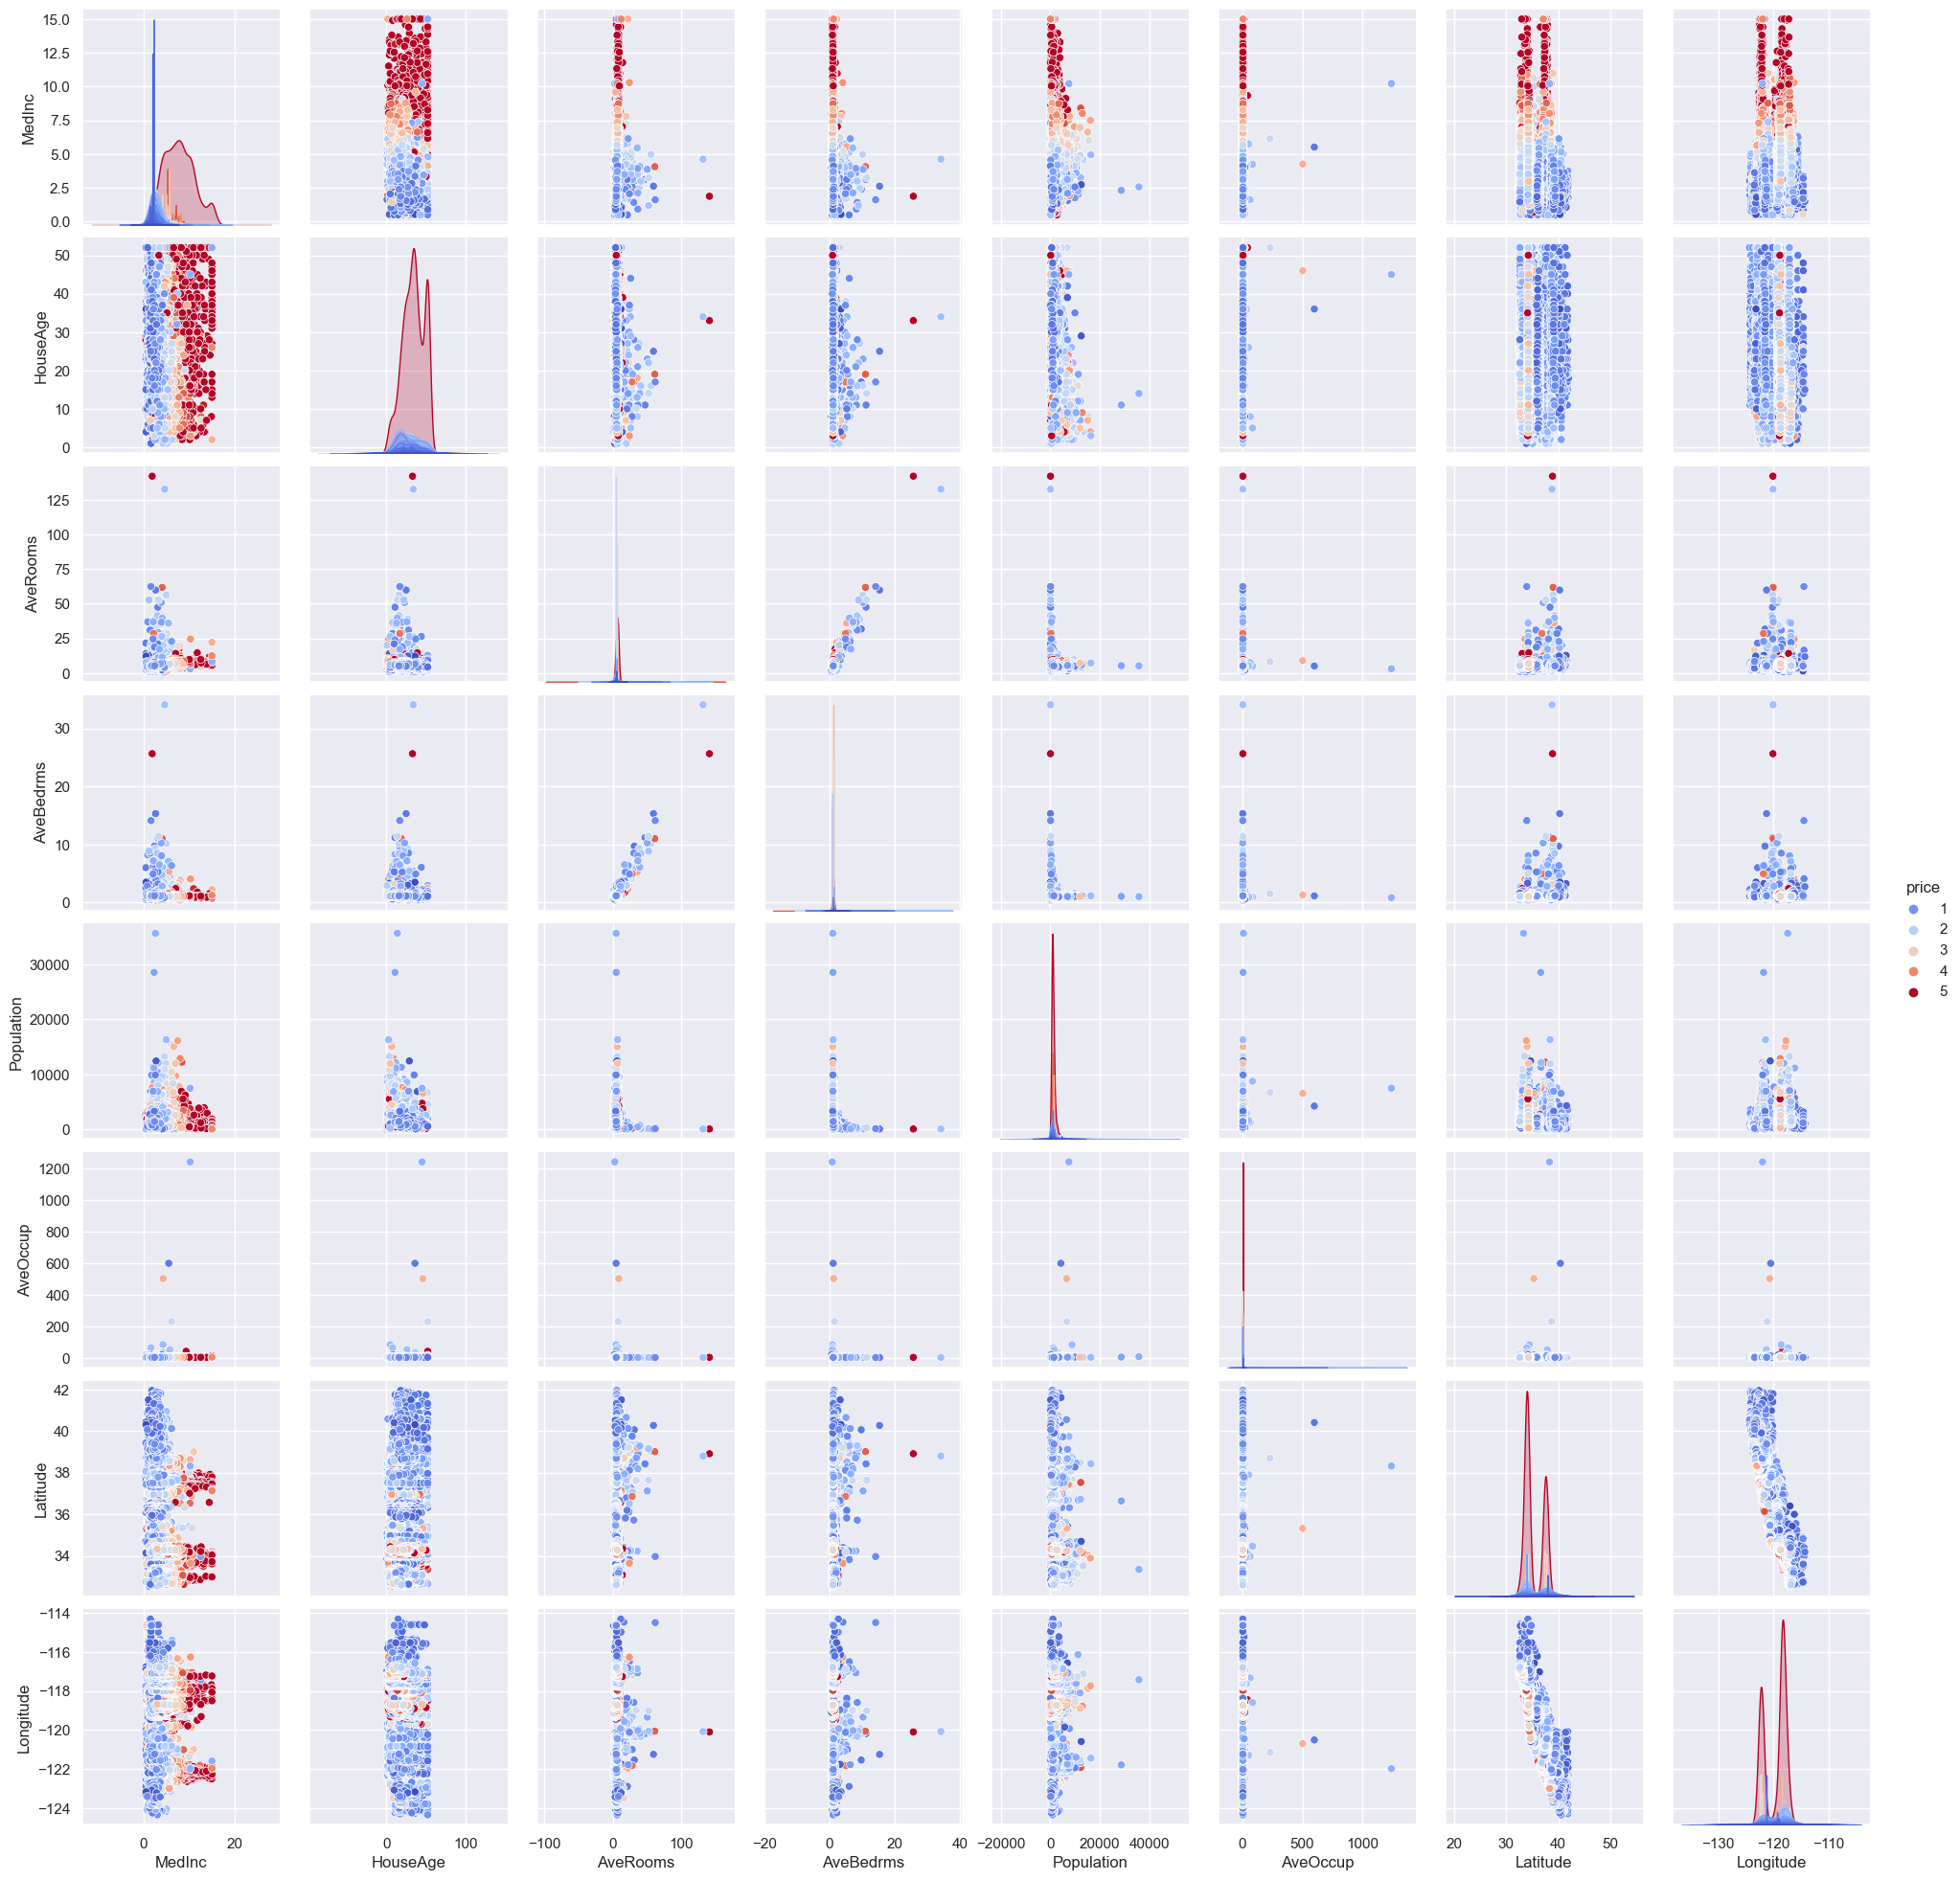

In [15]:
sns.pairplot(California,hue='price',palette='coolwarm')

# with LinearRegression model

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = California[['MedInc', 'HouseAge', 'AveRooms', 'Population']]
y = California['price']

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model =  LinearRegression()

In [28]:
model.fit(X_train,Y_train)

LinearRegression()

In [29]:
predictions=model.predict(X_test)
predictions

array([2.93631652, 5.59132275, 1.76462403, ..., 2.584553  , 2.53817738,
       3.85937072])

In [30]:
from sklearn.metrics import r2_score

In [31]:
score=r2_score(Y_test,predictions)
score

0.49463332308749286

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
absolute_error= mean_absolute_error(Y_test,predictions)
absolute_error

0.6057587094112359

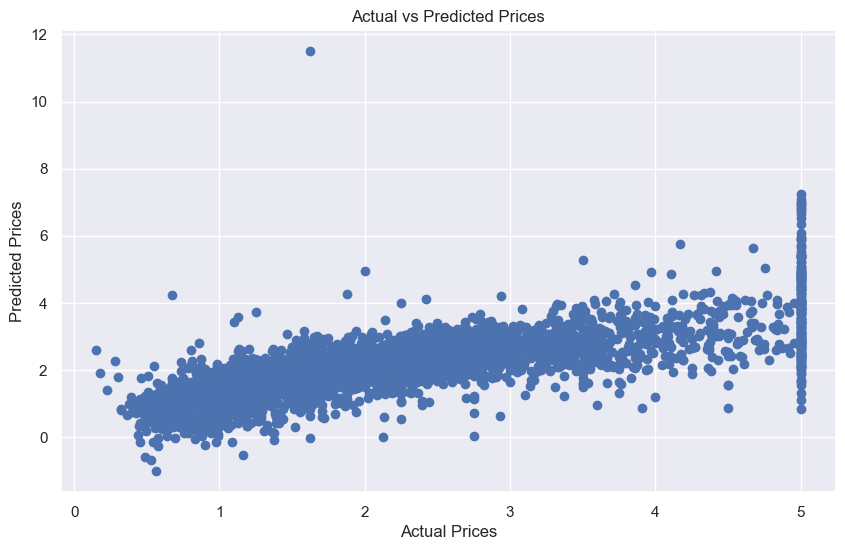

In [34]:
X = California.drop('price', axis=1)
y = California['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

In [37]:
# R²
r2 = r2_score(y_test, predictions)
print(f'R² Score: {r2:.2f}')

# RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE: {rmse:.2f}')


R² Score: 0.58
RMSE: 0.75


## with Support Vector Machines model

In [4]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split


In [5]:
california = fetch_california_housing()
California = pd.DataFrame(california.data, columns=california.feature_names)
California['price'] = california['target']

X = California.drop('price', axis=1)
y = California['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [6]:
# StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# SVR
svr_model = SVR(kernel='rbf', C=100, gamma=0.1)  # استخدام kernel راديالي لتعامل مع العلاقات غير الخطية
svr_model.fit(X_train_scaled, y_train)

SVR(C=100, gamma=0.1)

In [8]:
svr_predictions = svr_model.predict(X_test_scaled)

svr_mse = mean_squared_error(y_test, svr_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

In [9]:
print(f"SVM - Mean Squared Error: {svr_mse}")
print(f"SVM - R-squared: {svr_r2}")

SVM - Mean Squared Error: 0.32450271430413125
SVM - R-squared: 0.7523653151859921


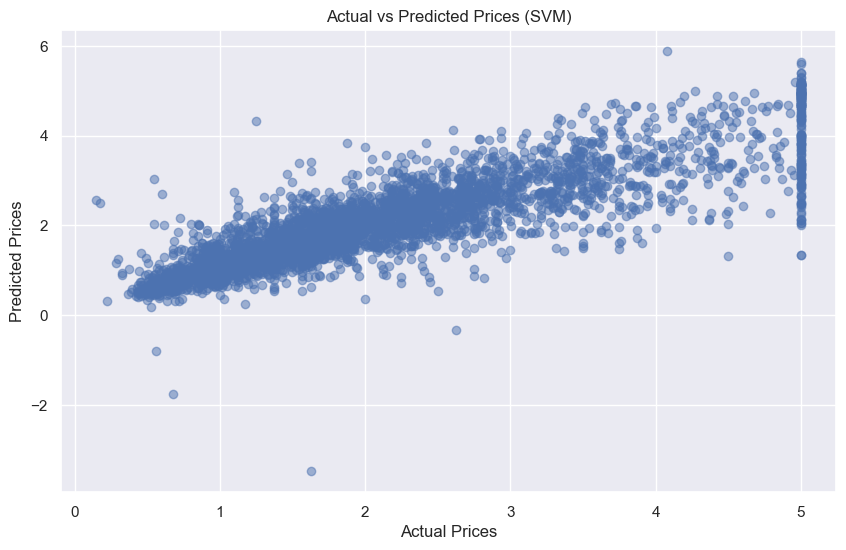

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_predictions, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices (SVM)')
plt.show()